# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:

sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:

sinasc_1 = sinasc_raw[
    ['IDADEMAE',
     'IDADEPAI', 
     'munResNome',]
]

result = sinasc_1.dropna().groupby('munResNome').mean().round(2)
result


,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.89,29.55
Alto Alegre dos Parecis,24.68,29.18
Alto Paraíso,22.83,28.83
Alvorada D'Oeste,26.83,30.76
Ariquemes,28.13,32.47
Buritis,24.75,30.81
Cabixi,32.17,34.33
Cacaulândia,31.00,36.33
Cacoal,26.98,30.93


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [4]:

sinasc_2 = sinasc_raw[['ESCMAE', 'PESO', 'DTNASC','SEXO']]

sinasc_2.groupby(['ESCMAE','DTNASC','SEXO'])['PESO'].mean().unstack().dropna().round()


SEXO                    Feminino  Masculino
ESCMAE      DTNASC                         
1 a 3 anos  2019-01-10    3651.0     3078.0
            2019-01-12    3155.0     2886.0
            2019-01-13    3645.0     3080.0
            2019-01-14    3550.0     3385.0
            2019-01-16    3175.0     2938.0
...                          ...        ...
8 a 11 anos 2019-12-30    3159.0     3279.0
            2019-12-31    3418.0     3354.0
Nenhuma     2019-05-02    3175.0     3080.0
            2019-06-07    3845.0      350.0
            2019-08-08    3315.0     3520.0

[1178 rows x 2 columns]

### 3. Qual o municipio que nasceu menos bebe em 2019? 
     
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [5]:
# Qual o municipio que nasceu menos bebe em 2019 ? 

#  --> Município ignorado - RO --> com 1 Nascimento

sinasc_3 = sinasc_raw[['munResNome', 'QTDFILVIVO', 'QTDFILMORT']].dropna()

sinasc_3['VIVO_MORTO_SUM'] = sinasc_raw['QTDFILVIVO'] + sinasc_raw['QTDFILMORT'] 

sinasc_3.groupby('munResNome')['VIVO_MORTO_SUM'].count().sort_values(ascending=True)



munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Parecis                        42
Primavera de Rondônia          43
Rio Crespo                     47
São Felipe D'Oeste             53
Teixeirópolis                  64
Cacaulândia                    74
Vale do Paraíso                79
Cabixi                         80
Ministro Andreazza             84
Vale do Anari                  92
Theobroma                      95
Novo Horizonte do Oeste        97
Santa Luzia D'Oeste            98
Itapuã do Oeste                98
Campo Novo de Rondônia        103
Nova União                    103
Governador Jorge Teixeira     108
Corumbiara                    126
Alto Alegre dos Parecis       149
Chupinguaia                   160
Mirante da Serra              162
Seringueiras                  166
Urupá                         169
Monte Negro                   187
Buritis                       195
Cujubim                       201
Alv

In [6]:
# - qual a idade media, maxima, minima das maes nesse municipio?

# - qual a idade media, maxima, minima dos pais nesse municipio?

sinasc_4 = sinasc_raw[['munResNome','IDADEMAE', 'IDADEPAI']].dropna()

result = sinasc_4.groupby(['munResNome'])

result.agg({'IDADEMAE':[('Média','mean'), 
                        ('Máximo', 'max'), 
                        ('Minimo', 'min')], 
            'IDADEPAI':[('Média','mean'), 
                        ('Máximo', 'max'), 
                        ('Minimo', 'min')]
           }).round(2)


IDADEMAE               IDADEPAI              
                             Média Máximo Minimo    Média Máximo Minimo
munResNome                                                             
Alta Floresta D'Oeste        25.89     53     14    29.55   58.0   17.0
Alto Alegre dos Parecis      24.68     41     14    29.18   50.0   16.0
Alto Paraíso                 22.83     32     16    28.83   49.0   21.0
Alvorada D'Oeste             26.83     40     15    30.76   52.0   17.0
Ariquemes                    28.13     39     15    32.47   51.0   20.0
Buritis                      24.75     42     16    30.81   49.0   18.0
Cabixi                       32.17     38     18    34.33   47.0   19.0
Cacaulândia                  31.00     42     18    36.33   50.0   28.0
Cacoal                       26.98     47     14    30.93   66.0   17.0
Campo Novo de Rondônia       24.90     40     17    30.50   40.0   21.0
Candeias do Jamari           23.68     34     15    29.89   41.0   21.0
Castanheiras                 28.07     39     18    30.39   43.0   17.0
Cerejeiras                   28.36     42     15    31.65   52.0   19.0
Chupinguaia                  26.89     38     17    29.63   46.0   20.0
Colorado do Oeste            31.16     41     23    34.35   53.0   23.0
Corumbiara                   29.00     43     17    32.47   52.0   21.0
Costa Marques                25.25     41     17    30.61   60.0   17.0
Cujubim                      27.40     37     17    31.40   44.0   19.0
Espigão D'Oeste              26.81     44     14    31.20   86.0   16.0
Governador Jorge Teixeira    25.56     34     17    29.22   37.0   22.0
Guajará-Mirim                26.06     39     19    30.47   44.0   19.0
Itapuã do Oeste              31.38     39     27    42.50   73.0   25.0
Jaru                         28.45     44     15    32.20   62.0   19.0
Ji-Paraná                    27.28     44     13    31.13   63.0   15.0
Machadinho D'Oeste           26.05     40     13    31.33   53.0   17.0
Ministro Andreazza           27.89     44     17    33.85   55.0   21.0
Mirante da Serra             26.93     41     16    32.15   56.0   20.0
Monte Negro                  27.64     40     15    34.68   55.0   20.0
Município ignorado - RO      24.00     24     24    22.00   22.0   22.0
Nova Brasilândia D'Oeste     27.10     38     15    30.52   48.0   20.0
Nova Mamoré                  26.05     46     15    31.69   43.0   19.0
Nova União                   27.37     39     16    31.37   53.0   18.0
Novo Horizonte do Oeste      26.99     41     16    31.59   56.0   20.0
Ouro Preto do Oeste          27.11     44     14    31.23   60.0   17.0
Parecis                      26.97     41     17    32.47   61.0   18.0
Pimenta Bueno                25.45     47     13    29.75   70.0   16.0
Pimenteiras do Oeste         32.60     40     27    35.60   45.0   25.0
Porto Velho                  28.36     44     12    32.35   65.0   16.0
Presidente Médici            26.17     43     15    30.15   64.0   16.0
Primavera de Rondônia        28.08     39     17    31.89   44.0   21.0
Rio Crespo                   26.00     26     26    28.00   28.0   28.0
Rolim de Moura               26.55     44     14    30.36   69.0   16.0
Santa Luzia D'Oeste          26.04     41     15    30.70   53.0   18.0
Seringueiras                 25.06     39     15    30.50   47.0   20.0
São Felipe D'Oeste           26.98     41     17    31.40   57.0   18.0
São Francisco do Guaporé     26.94     40     15    31.64   54.0   19.0
São Miguel do Guaporé        27.47     42     17    32.67   60.0   19.0
Teixeirópolis                27.45     39     16    31.50   67.0   20.0
Theobroma                    24.92     38     19    30.08   45.0   23.0
Urupá                        27.12     43     15    31.01   48.0   17.0
Vale do Anari                27.13     39     17    34.00   58.0   23.0
Vale do Paraíso              25.60     40     14    29.98   51.0   18.0
Vilhena                      30.61     44     16    34.15   60.0  

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [7]:
# - Qual o municipio que nasceu mais bebe no mês de março?

sinasc_5 = sinasc_raw[['DTNASC', 'QTDFILVIVO','QTDFILMORT', 'munResNome']].dropna()  

sinasc_5['VIVO_MORTO_SUM'] = sinasc_raw['QTDFILVIVO'] + sinasc_raw['QTDFILMORT']

sinasc_5.set_index('DTNASC', inplace=False)

sinasc_5[(sinasc_5['DTNASC'] >= '2019-03-01') & 
         (sinasc_5['DTNASC'] <= '2019-03-30')].groupby('munResNome')['VIVO_MORTO_SUM'].count().sort_values(ascending=False)

# Porto Velho --> 541 Nascimentos no Referido Mês


munResNome
Porto Velho                  541
Ji-Paraná                    177
Vilhena                      144
Ariquemes                    136
Cacoal                       131
Jaru                          76
Guajará-Mirim                 70
Rolim de Moura                69
Ouro Preto do Oeste           67
Pimenta Bueno                 58
Nova Mamoré                   49
Espigão D'Oeste               43
São Miguel do Guaporé         39
Machadinho D'Oeste            39
Alta Floresta D'Oeste         31
Presidente Médici             29
São Francisco do Guaporé      29
Buritis                       29
Candeias do Jamari            28
Costa Marques                 23
Alto Paraíso                  21
Monte Negro                   20
Alvorada D'Oeste              20
Colorado do Oeste             19
Seringueiras                  19
Chupinguaia                   18
Nova Brasilândia D'Oeste      18
Cerejeiras                    16
Cujubim                       16
Urupá                         14

In [8]:

test = (sinasc_5['DTNASC'] >= '2019-03-01') & (sinasc_5['DTNASC'] <= '2019-03-30')

test.value_counts()


False    22695
True      2149
Name: DTNASC, dtype: int64

In [9]:

result = sinasc_4.groupby(['munResNome'])

result.agg({'IDADEMAE':[('Média','mean'), 
                        ('Máximo', 'max'), 
                        ('Minimo', 'min')], 
            'IDADEPAI':[('Média','mean'), 
                        ('Máximo', 'max'), 
                        ('Minimo', 'min')]
           }).round(2)


IDADEMAE               IDADEPAI              
                             Média Máximo Minimo    Média Máximo Minimo
munResNome                                                             
Alta Floresta D'Oeste        25.89     53     14    29.55   58.0   17.0
Alto Alegre dos Parecis      24.68     41     14    29.18   50.0   16.0
Alto Paraíso                 22.83     32     16    28.83   49.0   21.0
Alvorada D'Oeste             26.83     40     15    30.76   52.0   17.0
Ariquemes                    28.13     39     15    32.47   51.0   20.0
Buritis                      24.75     42     16    30.81   49.0   18.0
Cabixi                       32.17     38     18    34.33   47.0   19.0
Cacaulândia                  31.00     42     18    36.33   50.0   28.0
Cacoal                       26.98     47     14    30.93   66.0   17.0
Campo Novo de Rondônia       24.90     40     17    30.50   40.0   21.0
Candeias do Jamari           23.68     34     15    29.89   41.0   21.0
Castanheiras                 28.07     39     18    30.39   43.0   17.0
Cerejeiras                   28.36     42     15    31.65   52.0   19.0
Chupinguaia                  26.89     38     17    29.63   46.0   20.0
Colorado do Oeste            31.16     41     23    34.35   53.0   23.0
Corumbiara                   29.00     43     17    32.47   52.0   21.0
Costa Marques                25.25     41     17    30.61   60.0   17.0
Cujubim                      27.40     37     17    31.40   44.0   19.0
Espigão D'Oeste              26.81     44     14    31.20   86.0   16.0
Governador Jorge Teixeira    25.56     34     17    29.22   37.0   22.0
Guajará-Mirim                26.06     39     19    30.47   44.0   19.0
Itapuã do Oeste              31.38     39     27    42.50   73.0   25.0
Jaru                         28.45     44     15    32.20   62.0   19.0
Ji-Paraná                    27.28     44     13    31.13   63.0   15.0
Machadinho D'Oeste           26.05     40     13    31.33   53.0   17.0
Ministro Andreazza           27.89     44     17    33.85   55.0   21.0
Mirante da Serra             26.93     41     16    32.15   56.0   20.0
Monte Negro                  27.64     40     15    34.68   55.0   20.0
Município ignorado - RO      24.00     24     24    22.00   22.0   22.0
Nova Brasilândia D'Oeste     27.10     38     15    30.52   48.0   20.0
Nova Mamoré                  26.05     46     15    31.69   43.0   19.0
Nova União                   27.37     39     16    31.37   53.0   18.0
Novo Horizonte do Oeste      26.99     41     16    31.59   56.0   20.0
Ouro Preto do Oeste          27.11     44     14    31.23   60.0   17.0
Parecis                      26.97     41     17    32.47   61.0   18.0
Pimenta Bueno                25.45     47     13    29.75   70.0   16.0
Pimenteiras do Oeste         32.60     40     27    35.60   45.0   25.0
Porto Velho                  28.36     44     12    32.35   65.0   16.0
Presidente Médici            26.17     43     15    30.15   64.0   16.0
Primavera de Rondônia        28.08     39     17    31.89   44.0   21.0
Rio Crespo                   26.00     26     26    28.00   28.0   28.0
Rolim de Moura               26.55     44     14    30.36   69.0   16.0
Santa Luzia D'Oeste          26.04     41     15    30.70   53.0   18.0
Seringueiras                 25.06     39     15    30.50   47.0   20.0
São Felipe D'Oeste           26.98     41     17    31.40   57.0   18.0
São Francisco do Guaporé     26.94     40     15    31.64   54.0   19.0
São Miguel do Guaporé        27.47     42     17    32.67   60.0   19.0
Teixeirópolis                27.45     39     16    31.50   67.0   20.0
Theobroma                    24.92     38     19    30.08   45.0   23.0
Urupá                        27.12     43     15    31.01   48.0   17.0
Vale do Anari                27.13     39     17    34.00   58.0   23.0
Vale do Paraíso              25.60     40     14    29.98   51.0   18.0
Vilhena                      30.61     44     16    34.15   60.0  

In [10]:
# - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

# - qual a idade media, maxima, minima dos pais nesse municipio?

sinasc_6 =  sinasc_raw[['munResNome','QTDFILVIVO', 'IDADEPAI']].dropna()

resultado = sinasc_6.groupby(['munResNome'])

resultado.agg({'QTDFILVIVO': [('Média', 'mean'), 
                              ('Máxima', 'max'), 
                              ('Minima', 'min')], 
               'IDADEPAI': [('Média', 'mean'), 
                            ('Máxima', 'max'), 
                            ('Minima', 'min')]
              }).round()


QTDFILVIVO               IDADEPAI              
                               Média Máxima Minima    Média Máxima Minima
munResNome                                                               
Alta Floresta D'Oeste            1.0    7.0    0.0     30.0   58.0   17.0
Alto Alegre dos Parecis          1.0    5.0    0.0     29.0   50.0   16.0
Alto Paraíso                     1.0    2.0    0.0     29.0   49.0   21.0
Alvorada D'Oeste                 1.0    9.0    0.0     31.0   52.0   17.0
Ariquemes                        2.0    4.0    0.0     33.0   51.0   20.0
Buritis                          1.0    3.0    0.0     32.0   49.0   19.0
Cabixi                           0.0    2.0    0.0     34.0   47.0   19.0
Cacaulândia                      1.0    2.0    0.0     36.0   50.0   28.0
Cacoal                           1.0    7.0    0.0     31.0   66.0   17.0
Campo Novo de Rondônia           1.0    2.0    0.0     31.0   40.0   21.0
Candeias do Jamari               1.0    3.0    0.0     30.0   41.0   22.0
Castanheiras                     1.0    6.0    0.0     30.0   43.0   17.0
Cerejeiras                       1.0    8.0    0.0     32.0   52.0   19.0
Chupinguaia                      1.0    2.0    0.0     30.0   46.0   20.0
Colorado do Oeste                1.0    2.0    0.0     34.0   53.0   23.0
Corumbiara                       1.0    3.0    0.0     32.0   52.0   21.0
Costa Marques                    1.0   14.0    0.0     31.0   60.0   17.0
Cujubim                          2.0    7.0    0.0     31.0   44.0   19.0
Espigão D'Oeste                  1.0   12.0    0.0     31.0   86.0   16.0
Governador Jorge Teixeira        0.0    1.0    0.0     29.0   37.0   22.0
Guajará-Mirim                    1.0    3.0    0.0     30.0   44.0   19.0
Itapuã do Oeste                  2.0    5.0    0.0     42.0   73.0   25.0
Jaru                             1.0    3.0    0.0     32.0   62.0   19.0
Ji-Paraná                        1.0    6.0    0.0     31.0   63.0   15.0
Machadinho D'Oeste               1.0    8.0    0.0     31.0   53.0   17.0
Ministro Andreazza               1.0    6.0    0.0     34.0   55.0   21.0
Mirante da Serra                 1.0    3.0    0.0     32.0   56.0   20.0
Monte Negro                      1.0    3.0    0.0     35.0   55.0   20.0
Município ignorado - RO          1.0    1.0    1.0     22.0   22.0   22.0
Nova Brasilândia D'Oeste         1.0    4.0    0.0     31.0   48.0   20.0
Nova Mamoré                      2.0    5.0    0.0     32.0   43.0   20.0
Nova União                       1.0    3.0    0.0     32.0   53.0   18.0
Novo Horizonte do Oeste          1.0    4.0    0.0     32.0   56.0   20.0
Ouro Preto do Oeste              1.0    4.0    0.0     31.0   60.0   17.0
Parecis                          1.0    5.0    0.0     32.0   61.0   18.0
Pimenta Bueno                    1.0    9.0    0.0     30.0   70.0   16.0
Pimenteiras do Oeste             1.0    4.0    0.0     36.0   45.0   25.0
Porto Velho                      1.0    7.0    0.0     33.0   65.0   16.0
Presidente Médici                1.0    7.0    0.0     30.0   64.0   16.0
Primavera de Rondônia            1.0    4.0    0.0     32.0   44.0   21.0
Rio Crespo                       2.0    2.0    2.0     28.0   28.0   28.0
Rolim de Moura                   1.0    5.0    0.0     30.0   69.0   16.0
Santa Luzia D'Oeste              1.0   30.0    0.0     31.0   53.0   18.0
Seringueiras                     1.0    5.0    0.0     30.0   47.0   20.0
São Felipe D'Oeste               1.0    5.0    0.0     31.0   57.0   18.0
São Francisco do Guaporé         1.0    3.0    0.0     32.0   54.0   19.0
São Miguel do Guaporé            1.0    4.0    0.0     33.0   60.0   19.0
Teixeirópolis                    1.0    3.0    0.0     32.0   67.0   20.0
Theobroma                        0.0    2.0    0.0     30.0   45.0   23.0
Urupá                            1.0    5.0    0.0     31.0   48.0   17.0
Vale do Anari                    1.0    2.0    0.0     34.0   58.0   23.0
Vale do Paraíso               

In [11]:
# 'QTDFILMORT','QTDFILVIVO' POR MUNICIPIO

sinasc_m = sinasc_raw[['munResNome','QTDFILMORT','QTDFILVIVO']].dropna()

sinasc_m.groupby('munResNome')[['QTDFILMORT','QTDFILVIVO']].sum()  


,QTDFILMORT,QTDFILVIVO
munResNome,,
Alta Floresta D'Oeste,73.0,310.0
Alto Alegre dos Parecis,27.0,132.0
Alto Paraíso,53.0,253.0
Alvorada D'Oeste,37.0,197.0
Ariquemes,418.0,1647.0
Buritis,112.0,239.0
Cabixi,21.0,61.0
Cacaulândia,15.0,75.0
Cacoal,337.0,1230.0


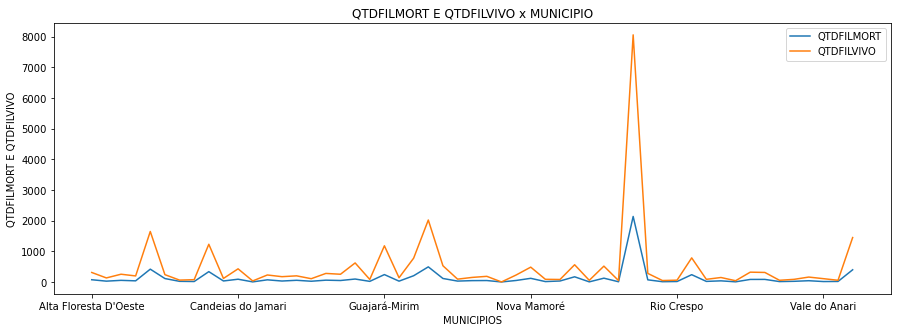

In [12]:

# GRAFICO: QTDFILMORT E QTDFILVIVO x MUNICIPIO

sinasc_m.groupby(['munResNome'])[['QTDFILMORT','QTDFILVIVO']].sum().plot(figsize=[15,5])

plt.ylabel('QTDFILMORT E QTDFILVIVO')

plt.xlabel('MUNICIPIOS')

plt.title('QTDFILMORT E QTDFILVIVO x MUNICIPIO');


In [13]:
# 'QTDFILMORT','QTDFILVIVO' E 'SEXO DO BEBE', POR MUNICIPIO

sinasc_ms = sinasc_raw[['munResNome','QTDFILMORT','QTDFILVIVO','SEXO']].dropna()

sinasc_ms.groupby(['munResNome','SEXO'])[['QTDFILMORT','QTDFILVIVO']].sum().unstack().dropna()



QTDFILMORT           QTDFILVIVO          
SEXO                        Feminino Masculino   Feminino Masculino
munResNome                                                         
Alta Floresta D'Oeste           32.0      41.0      152.0     158.0
Alto Alegre dos Parecis         15.0      12.0       72.0      60.0
Alto Paraíso                    25.0      28.0      134.0     119.0
Alvorada D'Oeste                18.0      19.0       94.0     103.0
Ariquemes                      205.0     213.0      732.0     915.0
Buritis                         57.0      55.0      112.0     127.0
Cabixi                          10.0      11.0       26.0      35.0
Cacaulândia                      7.0       8.0       27.0      48.0
Cacoal                         169.0     168.0      643.0     587.0
Campo Novo de Rondônia          13.0      20.0       48.0      67.0
Candeias do Jamari              42.0      48.0      207.0     222.0
Castanheiras                     0.0       3.0       14.0      20.0
Cerejeiras                      29.0      41.0      111.0     117.0
Chupinguaia                     18.0      13.0       95.0      78.0
Colorado do Oeste               27.0      28.0       91.0     109.0
Corumbiara                       5.0      19.0       43.0      64.0
Costa Marques                   23.0      36.0      129.0     150.0
Cujubim                         30.0      18.0      115.0     137.0
Espigão D'Oeste                 42.0      54.0      296.0     325.0
Governador Jorge Teixeira        9.0      11.0       47.0      36.0
Guajará-Mirim                  128.0     113.0      598.0     582.0
Itapuã do Oeste                 10.0      17.0       41.0      97.0
Jaru                           107.0      97.0      363.0     415.0
Ji-Paraná                      255.0     238.0     1023.0     998.0
Machadinho D'Oeste              46.0      68.0      252.0     277.0
Ministro Andreazza              13.0      16.0       39.0      53.0
Mirante da Serra                26.0      18.0       72.0      77.0
Monte Negro                     13.0      34.0       64.0     120.0
Nova Brasilândia D'Oeste        21.0      28.0      119.0     108.0
Nova Mamoré                     72.0      47.0      251.0     233.0
Nova União                       7.0       6.0       39.0      48.0
Novo Horizonte do Oeste         17.0      15.0       38.0      43.0
Ouro Preto do Oeste             79.0      90.0      269.0     293.0
Parecis                          2.0       2.0       30.0      24.0
Pimenta Bueno                   64.0      60.0      275.0     242.0
Pimenteiras do Oeste             0.0       7.0       19.0      27.0
Porto Velho                   1103.0    1033.0     4043.0    4016.0
Presidente Médici               37.0      33.0      146.0     134.0
Primavera de Rondônia            5.0       4.0       16.0      31.0
Rio Crespo                       6.0       9.0       14.0      45.0
Rolim de Moura                 119.0     119.0      372.0     414.0
Santa Luzia D'Oeste             10.0       9.0       35.0      51.0
Seringueiras                    21.0      16.0       82.0      64.0
São Felipe D'Oeste               3.0       2.0       23.0      18.0
São Francisco do Guaporé        41.0      42.0      152.0     167.0
São Miguel do Guaporé           45.0      39.0      165.0     146.0
Teixeirópolis                    4.0       9.0       19.0      36.0
Theobroma                       13.0       9.0       49.0      37.0
Urupá                           21.0      20.0       67.0      93.0
Vale do Anari                    6.0       8.0       63.0      45.0
Vale do Paraíso                  6.0      11.0       29.0      26.0
Vilhena                        193.0     205.0      718.0     731.0

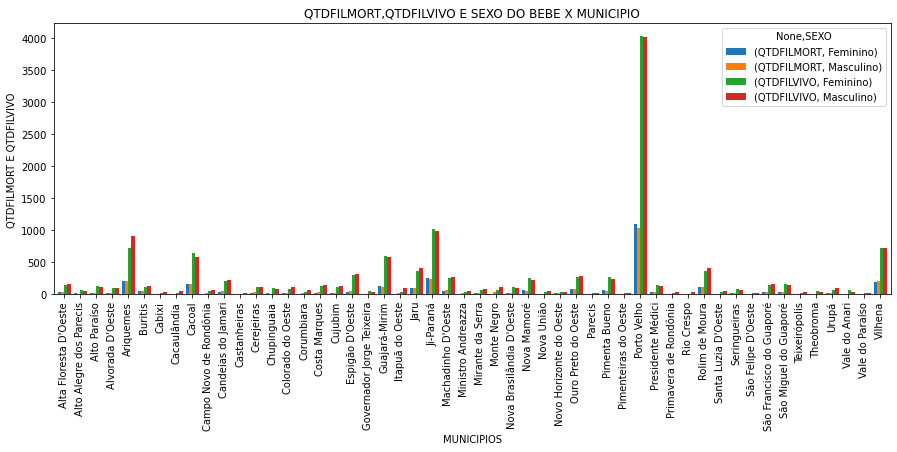

In [14]:
# GRAFICO: 'QTDFILMORT','QTDFILVIVO' E 'SEXO DO BEBE', POR MUNICIPIO

sinasc_ms.groupby(['munResNome','SEXO'])[['QTDFILMORT','QTDFILVIVO']].sum().unstack().dropna().plot.bar(width = 0.8,figsize=[15,5])

plt.ylabel('QTDFILMORT E QTDFILVIVO ')

plt.xlabel('MUNICIPIOS')

plt.title('QTDFILMORT,QTDFILVIVO E SEXO DO BEBE X MUNICIPIO');



    --> O PESO MÉDIO MINIMO, POR MUNICIPIO PARA BEBES DO SEXO FEMININO É 1195 GRAMAS E PARA OS BEBES DO SEXO MASCULINO É 350 GRAMAS
    
    --> O PESO MÉDIO MÁXIMO, POR MUNICIPIO PARA BEBES DO SEXO FEMININO É 4170 GRAMAS E PARA OS BEBES DO SEXO MASCULINO É 4300 GRAMAS
    
    --> O MUNICIPIO DE PORTO VELHO NO MES DE SETEMBRO, FOI O MUNICIPIO QUE APRESENTOU O MAIOR NUMERO DE NASCIMENTO --> 695
    
    --> PORTO VELHO AO LONGO DO TEMPO, FOI O MUNICIPIO EM QUE AS MÃES TIVERAM MAIS FILHOS NASCIDOS MORTOS(2137--> SENDO: SEXO FEMININO = 1103 E SEXO MASCULINO = 1033), MAIS TAMBÉM FOI O MUNICIPIO EM QUE AS MAES TIVERAM MAIS FILHOS NASCIDOS VIVOS(8061 --> SENDO: SEXO FEMININO = 4043 E SEXO MASCULINO = 4016)
    